# PHYS 541 Assignment 5 Question 1

In this question, we will consider some extensions to the Frogger game simulation that we studied in class.


a)	Consider the case where the frog can jump both forwards and backwards.  That is, at any moment, the frog can jump to any other lily pad, or all the way across the stream, or all the way back to the starting point (with equal probability of jumping to any new position.  Calculate the average number of jumps taken as a function of the number of lily pads.  Explain the result that you see, either through comparison with the forward-jump-only rule result, or with a theoretical prediction for this new rule set, or both.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats as stats
import random

In [2]:
# Number of lillipads
n = 30

In [3]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 1000000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [4]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0, n + 1):

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0, npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0 / (npad + 1) * (eval[npad - i - 1])
        eval.append(sum)
    #print("Theory: ",npad,eval[npad])


In [5]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # HOMEWORK CHANGE: Let the frog jump back to zero or to the end, or in between
            # BUT make sure the frog jumps
            jump = int(random.uniform(-current_paddle,(end-current_paddle+1)))
            while jump == 0:
                jump = int(random.uniform(-current_paddle,(end-current_paddle+1)))
            
            # jump ahead
            current_paddle = current_paddle + jump
            # if jump < 0:
            #     print ("Jump was:", jump)
            #     print("went from:", current_paddle-jump, "to", current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.499904
Expectation value for n = 2 is 2.332148
Expectation value for n = 3 is 3.249152
Expectation value for n = 4 is 4.193816
Expectation value for n = 5 is 5.170184
Expectation value for n = 6 is 6.140376
Expectation value for n = 7 is 7.123355
Expectation value for n = 8 is 8.109023
Expectation value for n = 9 is 9.110310
Expectation value for n = 10 is 10.090504
Expectation value for n = 11 is 11.100778
Expectation value for n = 12 is 12.070843
Expectation value for n = 13 is 13.056532
Expectation value for n = 14 is 14.071752
Expectation value for n = 15 is 15.055096
Expectation value for n = 16 is 16.067245
Expectation value for n = 17 is 17.072943
Expectation value for n = 18 is 18.074357
Expectation value for n = 19 is 19.062256
Expectation value for n = 20 is 20.030612
Expectation value for n = 21 is 21.034311
Expectation value for n = 22 is 22.040771
Expectation value for n = 23 is 23.038858
Expectation 

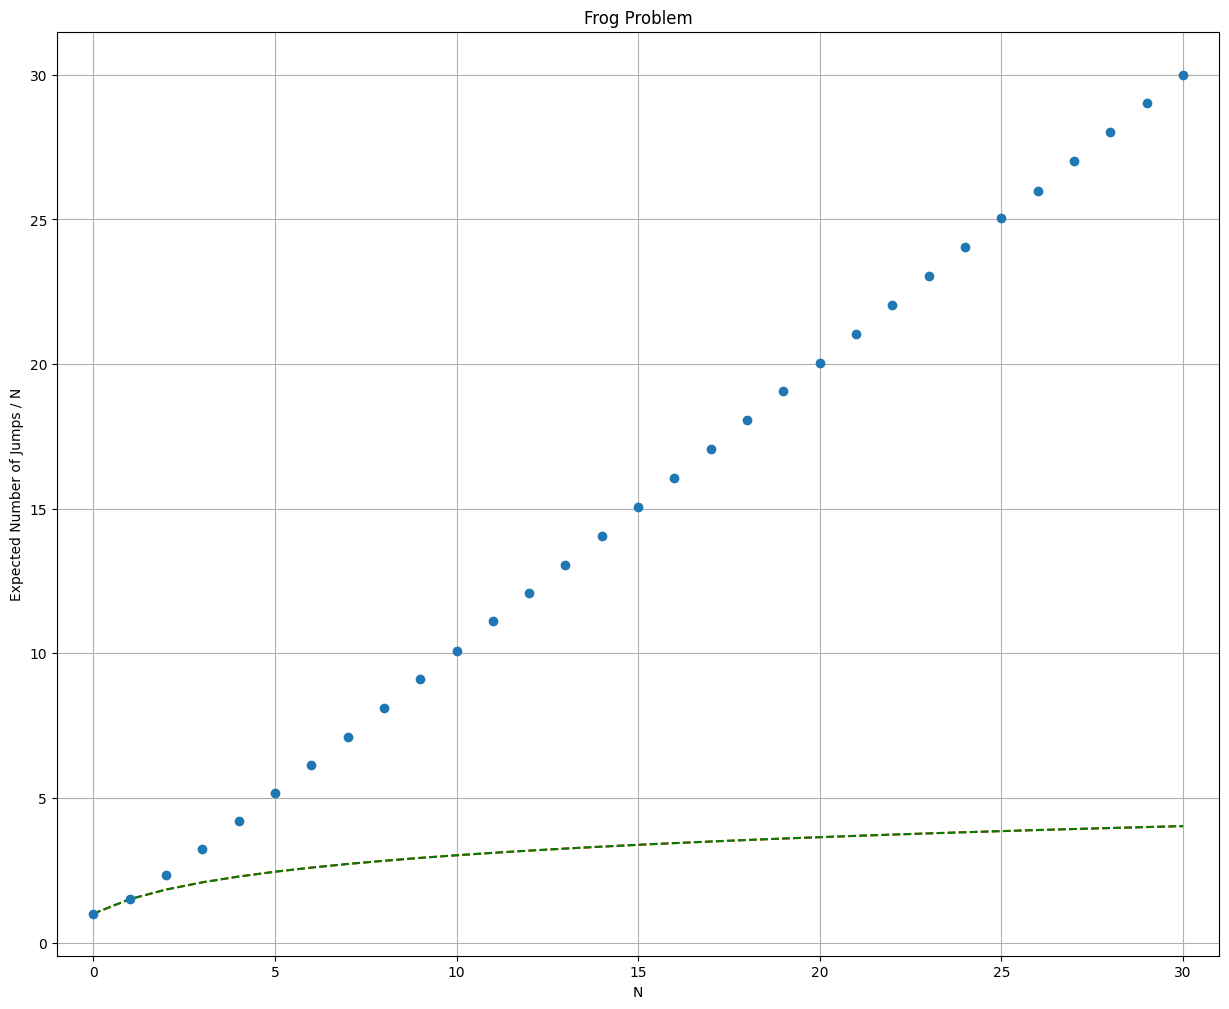

In [6]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')

This one is tricky. The obvious thing is that if you allow the frog to jump backwards, the expectation value of the number of jumps goes up by a lot. Exactly how it behaves is less obvious. At a quick glance I thought this was a direct one-to-one relationship. As you get past the first few values of n_pads, this seems to be the case (roughly). An analytic solution for this ruleset is hard because there is no upper limit on the number of jumps. The frog could jump back and forth for an eternity even if there's only one pad (it's unlikely, but possible). In my head, it makes sense that the average number of jumps would be about equal to the number of pads, since the odds that you get a huge number of jumps should even out with the odds of getting a low number of jumps.

b)	Consider the case where the frog can only jump forward, but now the probability of jumping to some lily pad (or all the way across the stream) is inversely proportional to the length of the jump.  

You will need to calculate a discrete probability distribution for each jump that is properly normalized.  For example, if there are ten lily pads, and the frog is on lily pad six, then she has five possible jump locations: lily pads 7, 8, 9, 10, and across the stream (11)).  You will need to calculate a discrete probability distribution for these five possible jump locations where the probabilities are inversely proportional to the jump distance AND is properly normalized.  

Compare the results of the plot of expected number of jumps as a function of the number of lily pads to the original case studied in class, and comment on the results.  Do you expect to see a larger number of jumps, on average, or a smaller number of jumps, on average, compared to the original version studied in class.

Bonus:  You will win my eternal admiration if you can come up with a “theory” that describes this new distribution!  Hint:  think about how, in the original example, we found a way to calculate the theory prediction recursively.

[0.4379562  0.2189781  0.1459854  0.10948905 0.08759124]
1.0


(array([43854.,     0., 21768.,     0.,     0., 14566.,     0., 10949.,
            0.,  8863.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

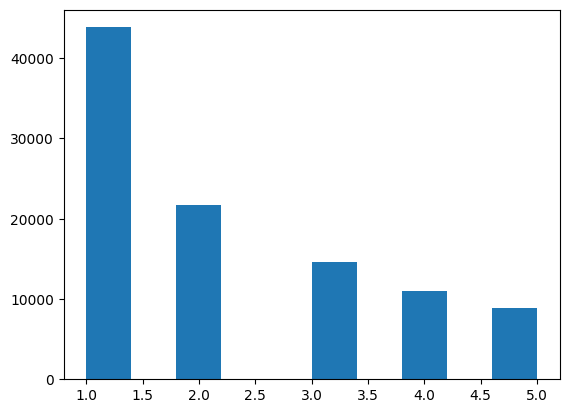

In [7]:
# Try this for one thing
# Say I could jump a maximum of 5 times
num_possible = 5
probs = np.zeros(num_possible)
norm = 0
for i in range(0, num_possible):
    val = 1/(i+1)
    norm += val
    probs[i] += val
probs /= norm
print(probs)
print(np.sum(probs))

jump = np.random.choice(range(1,num_possible+1), p=probs, size=100000)
plt.hist(jump)


In [8]:
# Number of lillipads
n = 50
random.seed(1)

In [9]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [10]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # HOMEWORK CHANGES
            # Get the number of possible jumps
            num_possible = end - current_paddle
            # Initialize array of probabilities
            probs = np.zeros(num_possible)
            norm = 0
            for i in range(0, num_possible):
                # Inversely proportional to distance
                val = 1/(i+1)
                # Get sum for normalization
                norm += val
                # Add inv. distance to array
                probs[i] += val
            # Normalize
            probs /= norm
            
            # Use numpy to "sample" this
            jump = np.random.choice(range(1,num_possible+1), p=probs)
            
            # jump ahead
            current_paddle = current_paddle + jump
            # if jump < 0:
            #     print ("Jump was:", jump)
            #     print("went from:", current_paddle-jump, "to", current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.664300
Expectation value for n = 2 is 2.167500
Expectation value for n = 3 is 2.616600
Expectation value for n = 4 is 2.974000
Expectation value for n = 5 is 3.271700
Expectation value for n = 6 is 3.594600
Expectation value for n = 7 is 3.860600
Expectation value for n = 8 is 4.075200
Expectation value for n = 9 is 4.289000
Expectation value for n = 10 is 4.505200
Expectation value for n = 11 is 4.685900
Expectation value for n = 12 is 4.880000
Expectation value for n = 13 is 5.053900
Expectation value for n = 14 is 5.225000
Expectation value for n = 15 is 5.408400
Expectation value for n = 16 is 5.541600
Expectation value for n = 17 is 5.637000
Expectation value for n = 18 is 5.781900
Expectation value for n = 19 is 5.964500
Expectation value for n = 20 is 6.104900
Expectation value for n = 21 is 6.155100
Expectation value for n = 22 is 6.283500
Expectation value for n = 23 is 6.445300
Expectation value for n = 

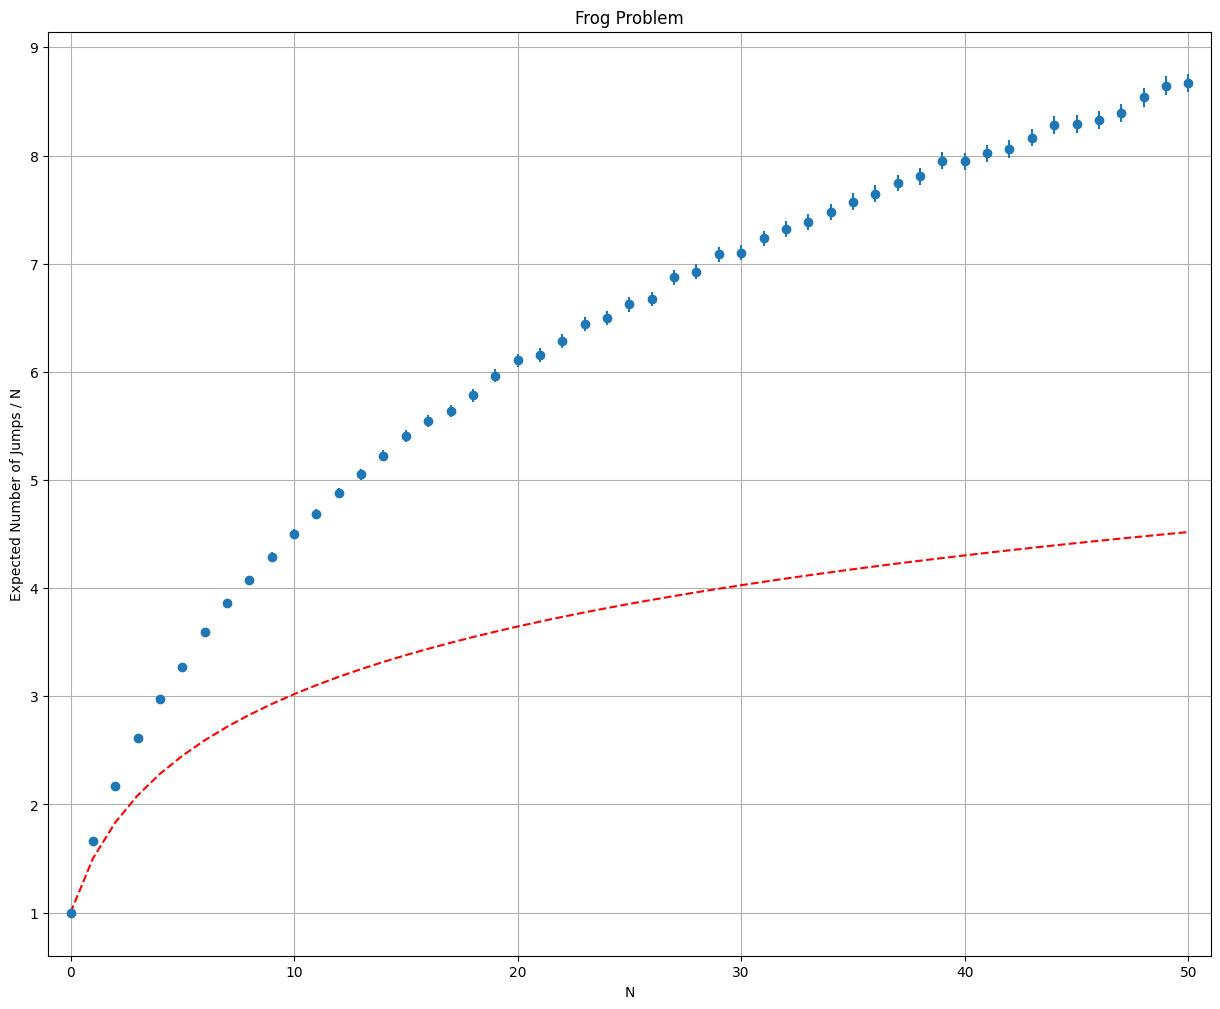

In [11]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval_harmonic,'r--')

This result makes sense to me. You would expect a similar shape since the options don't change between this and the original example. The increase is sharper since it's now more likely to take more jumps. 